## A high ratio of leaf to root respiration and no reduction in stored carbon with damage

In [1]:
import os
import math
import numpy as np
import matplotlib as mpl
from scipy.io import netcdf as nc
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
#from collections import OrderedDict
from matplotlib import cm
import csv
import warnings
warnings.filterwarnings('ignore')

# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

# colours for damage classes
viridis = cm.get_cmap('viridis', 10)
dm_colormap = viridis(range(10))


### Damage off

In [2]:
filename_in = 'V3/low_root_N_control_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
d_time = fin.variables['time'][:] / 365.
dmdntime = len(d_time)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)
patch_age_bins = fin.variables['fates_levage'][:]
nagebins = len(patch_age_bins)

BIOMASS = fin.variables['ED_biomass'][:,:]
AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
NPP = fin.variables['NPP'][:,:]
BIOMASS = fin.variables['ED_biomass'][:,:]
NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
GPP = fin.variables['GPP'][:,:]

NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]
M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

CROWNAREA_CANOPY_DAMAGE = fin.variables['CROWNAREA_CANOPY_DAMAGE']
CROWNAREA_CANOPY_MORT = fin.variables['MORTALITY_CROWNAREA_CANOPY']

ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

fin.close()

### Damage only

In [3]:
filename_in = 'V3/low_root_N_damageonly_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v1d_time = fin.variables['time'][:] / 365.
v1dmdntime = len(v1d_time)

v1_BIOMASS = fin.variables['ED_biomass'][:,:]
v1_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v1_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v1_NPP = fin.variables['NPP'][:,:]
v1_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v1_GPP = fin.variables['GPP'][:,:]

v1_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v1_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v1_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v1_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v1_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]
v1_NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:]
v1_NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:]

v1_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:]
v1_M3_MORTALITY_UNDERSTORY_CDSC= fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:]
v1_MORTALITY_CANOPY_CDPF = fin.variables['MORTALITY_CANOPY_CDPF'][:]
v1_MORTALITY_UNDERSTORY_CDPF= fin.variables['MORTALITY_UNDERSTORY_CDPF'][:]
v1_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v1_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]
v1_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v1_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v1_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v1_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v1_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v1_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v1_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v1_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v1_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v1_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v1_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v1_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v1_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v1_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]
v1_DDBH_CANOPY_CDPF = fin.variables['DDBH_CANOPY_CDPF'][:]
v1_DDBH_UNDERSTORY_CDPF = fin.variables['DDBH_UNDERSTORY_CDPF'][:]
v1_NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:]
v1_NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:]

v1_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v1_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

v1_CROWNAREA_CANOPY_DAMAGE = fin.variables['CROWNAREA_CANOPY_DAMAGE']
v1_CROWNAREA_CANOPY_MORT = fin.variables['MORTALITY_CROWNAREA_CANOPY']


fin.close()

### Mortality only

In [4]:
filename_in = 'V3/low_root_N_mort_only_e1b5bd9_ef845c8_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v2d_time = fin.variables['time'][:] / 365.
v2dmdntime = len(v2d_time)

v2_BIOMASS = fin.variables['ED_biomass'][:,:]
v2_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v2_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v2_NPP = fin.variables['NPP'][:,:]
v2_BIOMASS = fin.variables['ED_biomass'][:,:]
v2_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v2_GPP = fin.variables['GPP'][:,:]

v2_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v2_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v2_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v2_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v2_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

v2_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v2_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

v2_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
v2_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v2_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v2_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v2_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v2_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v2_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v2_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v2_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v2_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v2_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v2_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v2_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v2_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v2_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v2_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

v2_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v2_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v2_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

# DAMAGE
v2_DAMAGE_RATE = fin.variables['DAMAGE_RATE_CDCD'][:,:,:]
v2_DAMAGE_CFLUX = fin.variables['DAMAGE_CFLUX_CDCD'][:,:,:]
v2_RECOVERY_RATE = fin.variables['RECOVERY_RATE_CDCD'][:,:,:]
v2_RECOVERY_CFLUX = fin.variables['RECOVERY_CFLUX_CDCD'][:,:,:]

v2_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

v2_CROWNAREA_CANOPY_DAMAGE = fin.variables['CROWNAREA_CANOPY_DAMAGE']
v2_CROWNAREA_CANOPY_MORT = fin.variables['MORTALITY_CROWNAREA_CANOPY']


fin.close()

### Damage plus mortality 

In [5]:
filename_in = 'V3/low_root_N_damage_mort_e1b5bd9_bf013ef_2021-09-02.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
v3d_time = fin.variables['time'][:] / 365.
v3dmdntime = len(v3d_time)

v3_BIOMASS = fin.variables['ED_biomass'][:,:]
v3_AGB_SCLS = fin.variables['AGB_SCLS'][:,:,:]
v3_NCOHORT = fin.variables['ED_NCOHORTS'][:,:]
v3_NPP = fin.variables['NPP'][:,:]
v3_BIOMASS = fin.variables['ED_biomass'][:,:]
v3_NPP_SCPF = fin.variables['NPP_SCPF'][:,:,:]
v3_GPP = fin.variables['GPP'][:,:]

v3_NPLANT_SCLS = fin.variables['NPLANT_SCLS'][:,:,:]
v3_NPLANT_CANOPY_SCLS = fin.variables['NPLANT_CANOPY_SCLS'][:,:,:]
v3_NPLANT_UNDERSTORY_SCLS = fin.variables['NPLANT_UNDERSTORY_SCLS'][:,:,:]
v3_NPLANT_CANOPY_CDSC = fin.variables['NPLANT_CANOPY_CDSC'][:,:,:]
v3_NPLANT_UNDERSTORY_CDSC = fin.variables['NPLANT_UNDERSTORY_CDSC'][:,:,:]

v3_MORTALITY_CANOPY_SCLS = fin.variables['MORTALITY_CANOPY_SCLS'][:,:,:]
v3_MORTALITY_UNDERSTORY_SCLS = fin.variables['MORTALITY_UNDERSTORY_SCLS'][:,:,:]

v3_M3_MORTALITY_CANOPY_CDSC = fin.variables['M3_MORTALITY_CANOPY_CDSC'][:,:,:]
v3_M3_MORTALITY_UNDERSTORY_CDSC = fin.variables['M3_MORTALITY_UNDERSTORY_CDSC'][:,:,:]
v3_M11_MORTALITY_CANOPY_CDSC = fin.variables['M11_MORTALITY_CANOPY_CDSC'][:,:,:]
v3_M11_MORTALITY_UNDERSTORY_CDSC = fin.variables['M11_MORTALITY_UNDERSTORY_CDSC'][:,:,:]

v3_M1_SCLS = fin.variables['M1_SCLS'][:,:,:]
v3_M2_SCLS = fin.variables['M2_SCLS'][:,:,:]
v3_M3_SCLS = fin.variables['M3_SCLS'][:,:,:]
v3_M4_SCLS = fin.variables['M4_SCLS'][:,:,:]
v3_M6_SCLS = fin.variables['M6_SCLS'][:,:,:]
v3_M11_SCLS = fin.variables['M11_SCLS'][:,:,:]

v3_M3_CDSC = fin.variables['M3_CDSC'][:,:,:]
v3_M11_CDSC = fin.variables['M11_CDSC'][:,:,:]
v3_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]

v3_DDBH_CANOPY_SCLS = fin.variables['DDBH_CANOPY_SCLS'][:,:,:]
v3_DDBH_UNDERSTORY_SCLS = fin.variables['DDBH_UNDERSTORY_SCLS'][:,:,:]
v3_DDBH_CDSC = fin.variables['DDBH_CDSC'][:]

v3_NPLANT_CDSC = fin.variables['NPLANT_CDSC'][:,:,:]
v3_MORTALITY_CDSC = fin.variables['MORTALITY_CDSC'][:,:,:]
v3_DDBH_CDSC = fin.variables['DDBH_CDSC'][:,:,:]

# DAMAGE
v3_DAMAGE_RATE = fin.variables['DAMAGE_RATE_CDCD'][:,:,:]
v3_DAMAGE_CFLUX = fin.variables['DAMAGE_CFLUX_CDCD'][:,:,:]
v3_RECOVERY_RATE = fin.variables['RECOVERY_RATE_CDCD'][:,:,:]
v3_RECOVERY_CFLUX = fin.variables['RECOVERY_CFLUX_CDCD'][:,:,:]

v3_ZSTAR_BY_AGE = fin.variables['ZSTAR_BY_AGE'][:]

v3_CROWNAREA_CANOPY_DAMAGE = fin.variables['CROWNAREA_CANOPY_DAMAGE']
v3_CROWNAREA_CANOPY_MORT = fin.variables['MORTALITY_CROWNAREA_CANOPY']

fin.close()

In [6]:
### Carbon residence time
v2_cveg = np.squeeze(v2_BIOMASS)/1000
v2_npp = np.sum(np.squeeze(v2_NPP_SCPF), axis=1)
v2_cres = v2_cveg/v2_npp

v1_cveg = np.squeeze(v1_BIOMASS)/1000
v1_npp = np.sum(np.squeeze(v1_NPP_SCPF), axis=1)
v1_cres = v1_cveg/v1_npp

v3_cveg = np.squeeze(v3_BIOMASS)/1000
v3_npp = np.sum(np.squeeze(v3_NPP_SCPF), axis=1)
v3_cres = v3_cveg/v3_npp

cveg = np.squeeze(BIOMASS)/1000
npp = np.sum(np.squeeze(NPP_SCPF), axis=1)
cres = cveg/npp

### Canopy height thresholds
z = ZSTAR_BY_AGE
z1 = v1_ZSTAR_BY_AGE
z2 = v2_ZSTAR_BY_AGE
z3 = v3_ZSTAR_BY_AGE



### Figure 3

damage only damage 46.358856
damage only mort [128.8155]
damage only percent [26.464405]
damage only total [175.17436]
d + m damage 48.348007
d + m mort [157.52226]
d + m percent [27.599934]
d + m total  [177.16351]
mort only total [214.2948]
control total [128.82782]


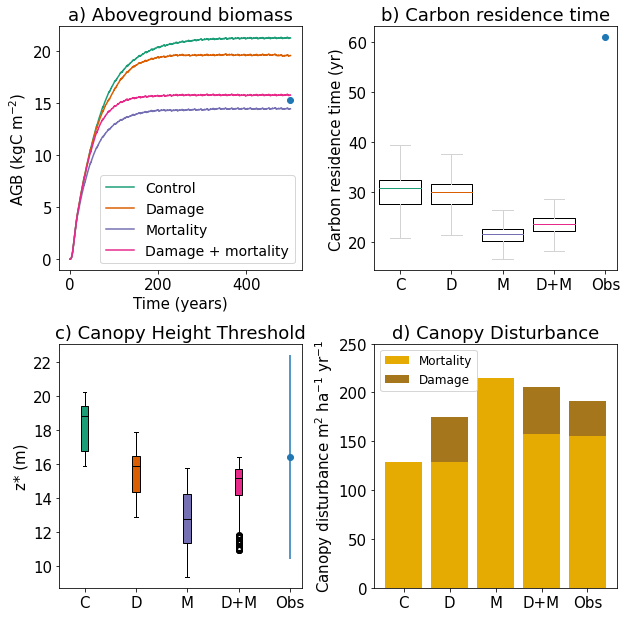

In [7]:
fig3, ((f3ax0, f3ax1), (f3ax2, f3ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(10,10))

f3ax0.plot(d_time, np.sum(AGB_SCLS, axis=1), label = 'Control', 
          color=colormap[0])
f3ax0.plot(d_time, np.sum(v1_AGB_SCLS, axis = 1), label = 'Damage', color=colormap[1])
f3ax0.plot(d_time, np.sum(v2_AGB_SCLS, axis = 1), label = 'Mortality', color=colormap[2])
f3ax0.plot(d_time, np.sum(v3_AGB_SCLS, axis = 1), label = 'Damage + mortality', color=colormap[3])

f3ax0.errorbar(d_time[5999], 15.3, fmt ='o', xerr= None)


f3ax0.set_title(r'a) Aboveground biomass', fontsize = 18)
f3ax0.set_ylabel('AGB (kgC m$^{-2}$)', fontsize = 15)
f3ax0.set_xlabel('Time (years)', fontsize=15)
f3ax0.tick_params(labelsize=15)
f3ax0.legend(prop={'size':14})


data = [cres,v1_cres, v2_cres,v3_cres]
flierprops = dict(markerfacecolor='lightgrey', markersize=3,
                  linestyle='none', markeredgecolor='lightgrey')

f3ax1.boxplot(cres, positions=[1], flierprops=flierprops, 
             medianprops=dict(color=colormap[0]),
             capprops=dict(color='lightgrey'),
            whiskerprops=dict(color='lightgrey'), widths=0.8, 
              showfliers=False)
f3ax1.boxplot(v1_cres, positions=[2], flierprops=flierprops, 
             medianprops=dict(color=colormap[1]),
             capprops=dict(color='lightgrey'),
            whiskerprops=dict(color='lightgrey'), widths=0.8, 
              showfliers=False)
f3ax1.boxplot(v2_cres, positions=[3], flierprops=flierprops, 
             medianprops=dict(color=colormap[2]),
             capprops=dict(color='lightgrey'),
            whiskerprops=dict(color='lightgrey'), widths=0.8,
              showfliers=False)
f3ax1.boxplot(v3_cres, positions=[4], flierprops=flierprops, 
             medianprops=dict(color=colormap[3]),
             capprops=dict(color='lightgrey'),
            whiskerprops=dict(color='lightgrey'), widths=0.8, 
              showfliers=False)
f3ax1.errorbar(5, 61, fmt = 'o')

f3ax1.set_ylabel(r'Carbon residence time (yr)', fontsize=15)
f3ax1.set_title('b) Carbon residence time', fontsize=18)
f3ax1.tick_params(labelsize=15)
f3ax1.set_xticks(np.array([1, 2, 3, 4, 5]))
f3ax1.set_xticklabels(['C', 'D', 'M', 'D+M', 'Obs'])

#data = np.vstack((np.squeeze(z[4800:,6,:]), np.squeeze(z1[4800:,6,:]), np.squeeze(z2[4800:,6,:]), np.squeeze(z3[4800:,6,:])))
zall = np.squeeze(np.ravel(z[4800:,6:,:]))
z1all = np.squeeze(np.ravel(z1[4800:,6:,:]))
z2all = np.squeeze(np.ravel(z2[4800:,6:,:]))
z3all = np.squeeze(np.ravel(z3[4800:,6:,:]))

data = np.vstack((zall, z1all, z2all, z3all))

box1 = f3ax2.boxplot(data[0,:], positions=[1], patch_artist=True,
            boxprops=dict(facecolor=colormap[0]), 
            medianprops=dict(color='black'))
box1 = f3ax2.boxplot(data[1,:], positions=[2], patch_artist=True,
            boxprops=dict(facecolor=colormap[1]), 
            medianprops=dict(color='black'))
box1 = f3ax2.boxplot(data[2,:], positions=[3], patch_artist=True,
            boxprops=dict(facecolor=colormap[2]), 
            medianprops=dict(color='black'))
box1 = f3ax2.boxplot(data[3,:], positions=[4], patch_artist=True,
            boxprops=dict(facecolor=colormap[3]), 
            medianprops=dict(color='black'))
f3ax2.errorbar(5, 16.4, yerr = 6.02, fmt = 'o')

f3ax2.set_ylabel(r'z* (m)', fontsize=15)
f3ax2.set_title('c) Canopy Height Threshold', fontsize=18)
f3ax2.tick_params(labelsize=15)
f3ax2.set_xticks(np.array([1, 2, 3, 4, 5]))
f3ax2.set_xticklabels(['C', 'D', 'M', 'D+M', 'Obs'])


carea_d = np.mean(np.reshape(CROWNAREA_CANOPY_DAMAGE[:,:], (500, 12)), axis=1)
d_mean = np.mean(carea_d[400:,], axis=0)
m_mean = np.mean(CROWNAREA_CANOPY_MORT[4800:,:],axis=0)

v1_carea_d = np.mean(np.reshape(v1_CROWNAREA_CANOPY_DAMAGE[:,:], (500, 12)), axis=1)
v1_d_mean = np.mean(v1_carea_d[400:,], axis=0)
v1_m_mean = np.mean(v1_CROWNAREA_CANOPY_MORT[4800:,:],axis=0)

v2_carea_d = np.mean(np.reshape(v2_CROWNAREA_CANOPY_DAMAGE[:,:], (500, 12)), axis=1)
v2_d_mean = np.mean(v2_carea_d[400:,], axis=0)
v2_m_mean = np.mean(v2_CROWNAREA_CANOPY_MORT[4800:,:],axis=0)

v3_carea_d = np.mean(np.reshape(v3_CROWNAREA_CANOPY_DAMAGE[:,:], (500, 12)), axis=1)
v3_d_mean = np.mean(v3_carea_d[400:,], axis=0)
v3_m_mean = np.mean(v3_CROWNAREA_CANOPY_MORT[4800:,:],axis=0)

f3ax3.bar(1, m_mean, color = colormap[5])
#f3ax3.bar(1, d_mean, color = colormap[0], bottom = m_mean)
f3ax3.bar(2, v1_m_mean, color = colormap[5], label = 'Mortality')
f3ax3.bar(2, v1_d_mean, color = colormap[6], bottom = v1_m_mean, label = 'Damage')
f3ax3.bar(3, v2_m_mean, color = colormap[5])
#f3ax3.bar(3, v2_d_mean, color = colormap[6], bottom = v2_m_mean)
f3ax3.bar(4, v3_m_mean, color = colormap[5])
f3ax3.bar(4, v3_d_mean, color = colormap[6], bottom = v3_m_mean)
f3ax3.bar(5, 155.3, color = colormap[5])
f3ax3.bar(5, 35.7, color = colormap[6], bottom = 155.3)

f3ax3.set_ylabel('Canopy disturbance m$^{2}$ ha$^{-1}$ yr$^{-1}$', fontsize = 15)
f3ax3.set_title('d) Canopy Disturbance', fontsize=18)
f3ax3.tick_params(labelsize=15)
f3ax3.set_xticks(np.array([1, 2, 3, 4, 5]))
f3ax3.set_xticklabels(['C', 'D', 'M', 'D+M', 'Obs'])
f3ax3.set_ylim(0, 250)
f3ax3.legend(prop={'size':12})

print('damage only damage', v1_d_mean)
print('damage only mort', v1_m_mean)
print('damage only percent', v1_d_mean/(v1_d_mean+v1_m_mean)*100)
print('damage only total', v1_d_mean + v1_m_mean)

print('d + m damage', v3_d_mean)
print('d + m mort', v3_m_mean)
print('d + m percent', v3_d_mean/(v1_d_mean+v1_m_mean)*100)
print('d + m total ', v3_d_mean + v1_m_mean)

print('mort only total', v2_m_mean)
print('control total', m_mean)


plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)


plt.savefig("Figures_v3/Figure_3.png", format = 'png', dpi = 300)
    